# Super Adjancy Matrix
Notebook to estimate the resonances via the super adjancy matrix. Comparison with those from Ulam's method.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from chebyshev_hofbauer_resonances.adjacency_to_super import (
    create_super_adjacency,
    generate_opp_approx,
)
from chebyshev_hofbauer_resonances.hofbauer_functions import create_adjacency_matricies
from chebyshev_hofbauer_resonances.operator_approx import cheb_op_ap
from chebyshev_hofbauer_resonances.ulams_method import ulams_method

In [ ]:
alpha = 1.2


def tent_map(x):
    return alpha * np.minimum(x, 1 - x)


# This is only the left branch.
def L_left(phi):
    return lambda x: np.where(
        (x >= 0) & (x <= alpha / 2), (1 / alpha) * (phi(x / alpha)), np.nan
    )


# This is only the right branch.
def L_right(phi):
    return lambda x: np.where(
        (x >= 0) & (x <= alpha / 2), (1 / alpha) * (phi(1 - x / alpha)), np.nan
    )


# This is the full operator.
def L(phi):
    return lambda x: np.where(
        (x >= 0) & (x <= alpha / 2),
        (1 / alpha) * (phi(x / alpha) + phi(1 - x / alpha)),
        0,
    )

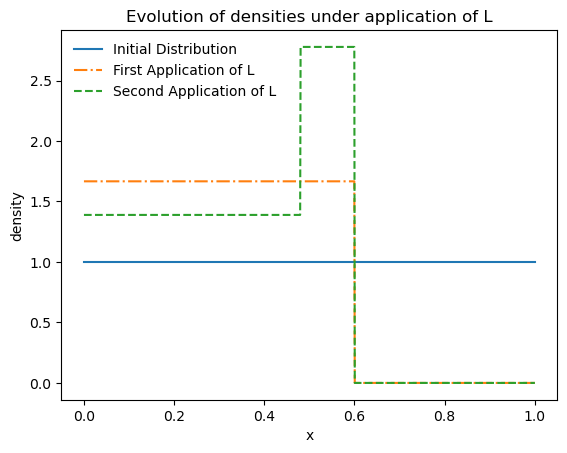

In [ ]:
Phi = lambda x: np.ones_like(x)

x, dx = np.linspace(0, 1, 1000, retstep=True)

plt.plot(x, Phi(x), label="Initial Distribution")
plt.plot(x, L(Phi)(x), ls="dashdot", label="First Application of L")
plt.plot(x, L(L(Phi))(x), ls="dashed", label="Second Application of L")

plt.legend(frameon=False)

plt.title("Evolution of densities under application of L")
plt.xlabel("x")
plt.ylabel("density")

plt.savefig("images/evolution_of_densities.png", dpi=300)

In [5]:
_ = create_adjacency_matricies(alpha, 50)
domains, _, left_matrix, right_matrix = _

c:\Users\dbruw\DENR3901\DENR3901\scripts\hofbauer_functions.py:220: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True) # Create data frame of all zeroes with dimension equal to number of nodes
c:\Users\dbruw\DENR3901\DENR3901\scripts\hofbauer_functions.py:233: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_left.fillna(0, inplace=True)
c:\Users\dbruw\DENR3901\DENR3901\scripts\hofbauer_functions.py:234: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call r

In [ ]:
# Takes the adjacecny matrix, the list of domains, and the trasnfer oprator and create the super adjacency matrix.
K = N = 100

super_adjacency_matrix_left = create_super_adjacency(
    left_matrix, domains, L_left, K, N, 1
)
super_adjacency_matrix_right = create_super_adjacency(
    right_matrix, domains, L_right, K, N, 1
)

super_adjacency_matrix = super_adjacency_matrix_left + super_adjacency_matrix_right

In [9]:
evals = np.linalg.eigvals(super_adjacency_matrix)
evals = evals[np.argsort(-np.abs(evals))]

In [21]:
L_hat = cheb_op_ap(L, 100, 100, (0, 1), (0, 1)).T
evals_full_map = np.linalg.eigvals(L_hat)
evals_full_map = evals_full_map[np.argsort(-np.abs(evals_full_map))]

In [11]:
L_ulam = ulams_method(1000, 10000, tent_map)
evals_ulam = np.linalg.eigvals(L_ulam)
evals_ulam = evals_ulam[np.argsort(-np.abs(evals_ulam))]

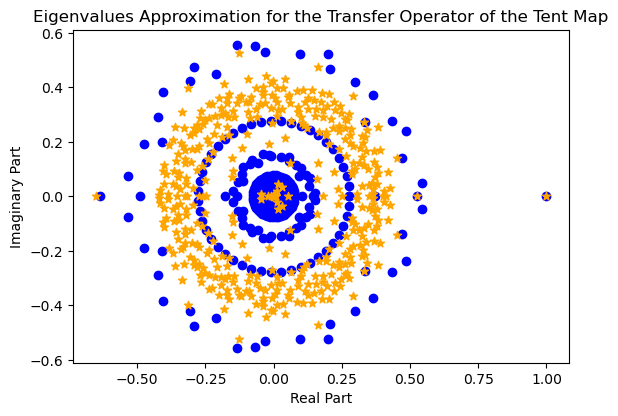

In [ ]:
num = -1

plt.scatter(np.real(evals)[0:num], np.imag(evals)[0:num], color="blue")
# plt.scatter(np.real(evals_full_map)[0:num], np.imag(evals_full_map)[0:num], color='red', marker='x')
plt.scatter(
    np.real(evals_ulam)[0:num], np.imag(evals_ulam)[0:num], color="orange", marker="*"
)
plt.gca().set_aspect("equal", adjustable="box")

plt.title("Eigenvalues Approximation for the Transfer Operator of the Tent Map")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")

plt.savefig("images/super_adj_vs_ulams.png", dpi=300, bbox_inches="tight")

# circle = plt.Circle((0, 0), 1/alpha, color='blue', fill=False)
# plt.gca().add_artist(circle)
plt.show()